In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
import networkx as nx

EX1.a

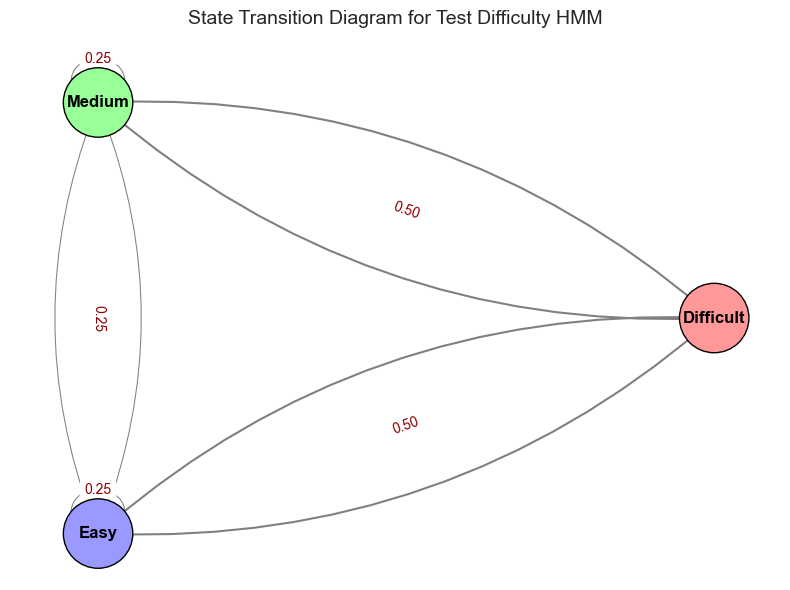

In [5]:
states=['Difficult','Medium','Easy']
n_states=len(states)
observations=['FB','B','S','NS']
n_observations = len(observations)


state_probability=np.array([1/3,1/3,1/3])

emission_probability = np.array([[0.1, 0.2,0.4,0.3],
                                   [0.15, 0.25,0.5,0.1],
                                  [0.2,0.3,0.4,0.1]])

transition_probability=np.array([[0.0,0.5,0.5],
                                [0.5,0.25,0.25],
                                [0.5,0.25,0.25]])

model=hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

G = nx.DiGraph()

for i, src in enumerate(states):
    for j, dst in enumerate(states):
        p = transition_probability[i, j]
        if p > 0:
            G.add_edge(src, dst, weight=p)

# Layout
pos = nx.circular_layout(G)

plt.figure(figsize=(8, 6))

node_colors = ['#ff9999', '#99ff99', '#9999ff']
nx.draw_networkx_nodes(G, pos, node_size=2500, node_color=node_colors, edgecolors='black')

nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    arrowstyle='-|>',
    arrowsize=20,
    width=[3*w for w in weights],
    connectionstyle='arc3,rad=0.2',
    edge_color='grey'
)

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="darkred", font_size=10)

plt.title("State Transition Diagram for Test Difficulty HMM", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

EX1.b

In [3]:
observations_sequence=['FB','FB','S','B','B','S','B','B','NS','B','B']
obs_index = [observations.index(o) for o in observations_sequence]
obs_idx_array = np.array(obs_index).reshape(-1, 1)
len_obs = len(observations_sequence)

alfa=np.zeros((len_obs,n_states))


for i in range(n_states):
       alfa[0, i] = state_probability[i] * emission_probability[i, obs_index[0]]

for t in range(1,len_obs):
    for j in range(n_states):
        alfa[t,j]=emission_probability[j,obs_index[t]]*np.sum(alfa[t-1,:]*transition_probability[:,j])

P_obs=np.sum(alfa[len_obs-1,:])

print("Probability of observing the sequence:")
print(f"P(O) = {P_obs:.10e}")
print(f"log P(O) = {np.log(P_obs):.6f}")


Probability of observing the sequence:
P(O) = 1.6888145198e-07
log P(O) = -15.594069


EX1.c

In [4]:
log_probability, hidden_states = model.decode(obs_idx_array,
                                              lengths = len(observations_sequence),
                                              algorithm ='viterbi' )
hidden_state_sequence = [states[s] for s in hidden_states]
print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_state_sequence)
print("Probability of this sequence:", np.exp(log_probability))


Log Probability : -23.195749966735846
Most likely hidden states: ['Easy', 'Easy', 'Difficult', 'Easy', 'Difficult', 'Medium', 'Difficult', 'Easy', 'Difficult', 'Easy', 'Difficult']
Probability of this sequence: 8.437500000000068e-11
